In [1]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("C:\\Users\\kshas\\Downloads\\Option4_Data\\Option4_Data\\Data\\Electric_Production.csv")

In [2]:
df.head()

,date,data
0,01-01-1985,72.5052
1,02-01-1985,70.6720
2,03-01-1985,62.4502
3,04-01-1985,57.4714
4,05-01-1985,55.3151


In [3]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# GRAPH 

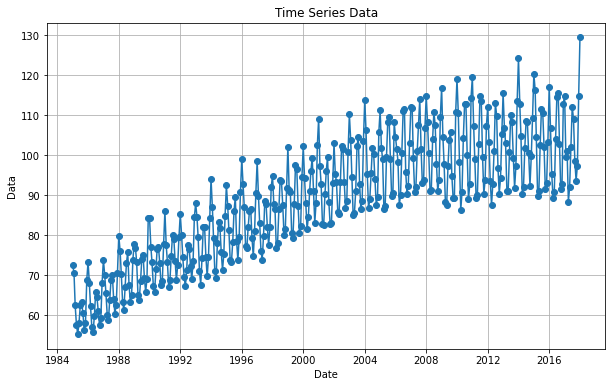

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(df.index.to_numpy(), df['data'].to_numpy(), marker='o')
plt.title('Time Series Data')
plt.xlabel('Date')
plt.ylabel('Data')
plt.grid(True)
plt.show()

# ADF

In [5]:
df

,data
date,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151
...,...
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359


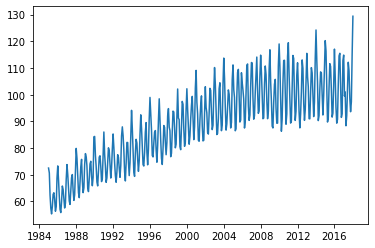

In [6]:
plt.plot(df["data"])

In [7]:
import numpy as np
from statsmodels.tsa.stattools import adfuller

# Assuming df["data"] contains your time series data
X = df["data"].values
result = adfuller(X)

print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


ADF Statistic: -2.256990
p-value: 0.186215
Critical Values:
	1%: -3.448
	5%: -2.869
	10%: -2.571


In [8]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

#  differencing
differenced_data = df['data'].diff().dropna()

# Perform ADF test
result = adfuller(differenced_data)

# Display the results
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

# Interpretation based on p-value
if result[1] < 0.05:  # Common threshold for significance
    print("Reject Ho - Time Series is Stationary")
else:
    print("Failed to Reject Ho - Time Series is Non-Stationary")


ADF Statistic: -7.104891
p-value: 0.000000
Critical Values:
	1%: -3.448
	5%: -2.869
	10%: -2.571
Reject Ho - Time Series is Stationary


d=1

# VISUALIZING 

<Figure size 864x576 with 0 Axes>

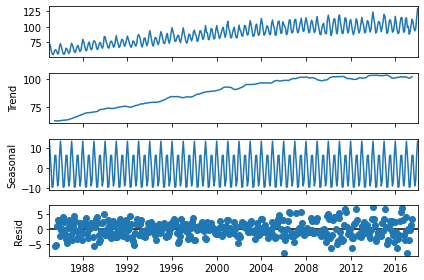

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load the dataset
file_path = 'C:\\Users\\kshas\\Downloads\\Option4_Data\\Option4_Data\\Data\\Electric_Production.csv'
data = pd.read_csv(file_path)
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Ensure the data is monthly and interpolate missing values
data_interpolated = data.interpolate()

# Decomposing the time series
# Specify the period as 12 for monthly data
decomposition = seasonal_decompose(data_interpolated, model='additive', period=12)

# Plotting the decomposed components
plt.figure(figsize=(12, 8))
decomposition.plot()
plt.show()


# HOLT WINTERS MODEL

In [10]:
import pandas as pd
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error

# Load the dataset
file_path = 'C:\\Users\\kshas\\Downloads\\Option4_Data\\Option4_Data\\Data\\Electric_Production.csv'  # Replace with your file path
data = pd.read_csv(file_path)
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Interpolating missing values (if any)
data_interpolated = data.interpolate()

# Fitting the Holt-Winters multiplicative model
model = ExponentialSmoothing(data_interpolated, trend='add', seasonal='mul', seasonal_periods=12).fit()

# Forecasting for the next 1, 2, 3, ..., 12 years (12, 24, 36, ..., 144 months)
forecast_periods = [12 * year for year in range(1, 13)]
forecasts = {periods: model.forecast(periods) for periods in forecast_periods}

# Printing the forecasts
for periods, forecast in forecasts.items():
    print(f"Forecast for next {periods // 12} year(s):\n{forecast}\n")


C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Forecast for next 1 year(s):
2018-02-01    117.766982
2018-03-01    109.949148
2018-04-01     98.871172
2018-05-01     99.419733
2018-06-01    109.633942
2018-07-01    119.114208
2018-08-01    119.327209
2018-09-01    108.194070
2018-10-01    100.198942
2018-11-01    103.777040
2018-12-01    119.612383
2019-01-01    128.591728
Freq: MS, dtype: float64

Forecast for next 2 year(s):
2018-02-01    117.766982
2018-03-01    109.949148
2018-04-01     98.871172
2018-05-01     99.419733
2018-06-01    109.633942
2018-07-01    119.114208
2018-08-01    119.327209
2018-09-01    108.194070
2018-10-01    100.198942
2018-11-01    103.777040
2018-12-01    119.612383
2019-01-01    128.591728
2019-02-01    119.236192
2019-03-01    111.319402
2019-04-01    100.102087
2019-05-01    100.656194
2019-06-01    110.996024
2019-07-01    120.592542
2019-08-01    120.806656
2019-09-01    109.534102
2019-10-01    101.438670
2019-11-01    105.059716
2019-12-01    121.089262
2020-01-01    130.177844
Freq: MS, dtype:

In [11]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Function to perform in-sample forecast and calculate metrics
def in_sample_forecast_metrics(data, years):
    months = years * 12  # Use months for monthly data
    train = data[:-months]
    test = data[-months:]

    model = ExponentialSmoothing(train, trend='add', seasonal='mul', seasonal_periods=12).fit()
    predictions = model.predict(start=test.index[0], end=test.index[-1])

    mse = mean_squared_error(test, predictions)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(test, predictions)
    r2 = r2_score(test, predictions)
    
    return predictions, mse, rmse, mape, r2

# Calculating metrics for 1, 2, 3, and 4 years
metrics_holt = {}
for years in range(1, 5):
    _, mse, rmse, mape, r2 = in_sample_forecast_metrics(data_interpolated, years)
    metrics_holt[years] = {
        'MSE': mse,
        'RMSE': rmse,
        'MAPE': mape,
        'R2': r2
    }

# Print the metrics
for year, values in metrics_holt.items():
    print(f"{year}-Year Metrics:")
    for metric, value in values.items():
        print(f"  {metric}: {value}")
    print()


C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


1-Year Metrics:
  MSE: 20.01644005485514
  RMSE: 4.47397363144388
  MAPE: 10.878053171844023
  R2: 0.833581389506637

2-Year Metrics:
  MSE: 18.167088685077232
  RMSE: 4.262286790571141
  MAPE: 10.434075397729
  R2: 0.8332075478030089

3-Year Metrics:
  MSE: 27.593692830615655
  RMSE: 5.252969905740528
  MAPE: 11.158625369056214
  R2: 0.729539899216274

4-Year Metrics:
  MSE: 70.55054144974412
  RMSE: 8.39943697218713
  MAPE: 12.609184056519606
  R2: 0.2609360080707408



# ACF PLOT

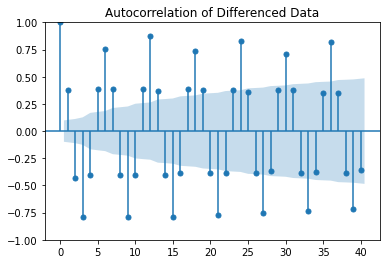

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# Replace 'file_path' with the actual path to your CSV file
file_path = 'C:\\Users\\kshas\\Downloads\\Option4_Data\\Option4_Data\\Data\\Electric_Production.csv'

# Load the dataset
data = pd.read_csv(file_path)
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Assuming 'Electric_Production' is the name of the column with the time series data
# If your column is named differently, replace 'Electric_Production' with the correct column name

# Perform a first difference to remove trend
data['data'] = data['data'].diff().dropna()

# Plot the autocorrelation graph of the differenced data
plot_acf(data['data'].dropna(), lags=40)
plt.title('Autocorrelation of Differenced Data')
plt.show()


# PACF

<Figure size 864x432 with 0 Axes>

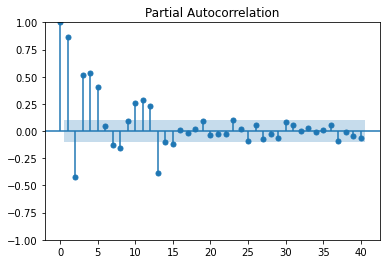

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Load the dataset
file_path = 'C:\\Users\\kshas\\Downloads\\Option4_Data\\Option4_Data\\Data\\Electric_Production.csv'   # Replace with your file path
data = pd.read_csv(file_path)
data['date'] = pd.to_datetime(data['date'])
data.set_index('date', inplace=True)

# Adjusting the date to the first day of the quarter
data_interpolated = data.interpolate()

# Plotting the Partial Autocorrelation Function (PACF)
plt.figure(figsize=(12, 6))
sm.graphics.tsa.plot_pacf(data_interpolated, lags=40)
plt.show()

# q=3 and p=4

# AR

C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


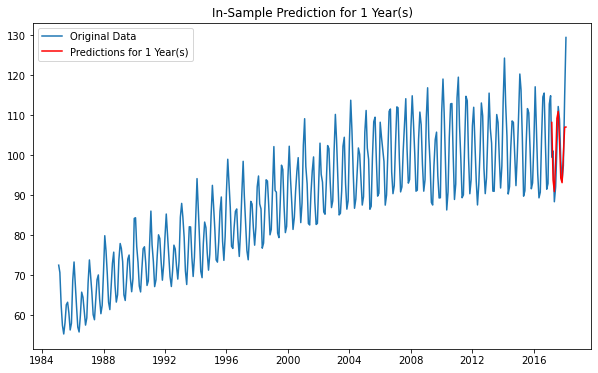

C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


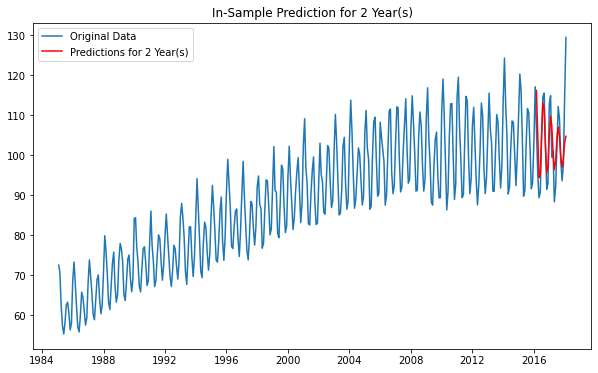

C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


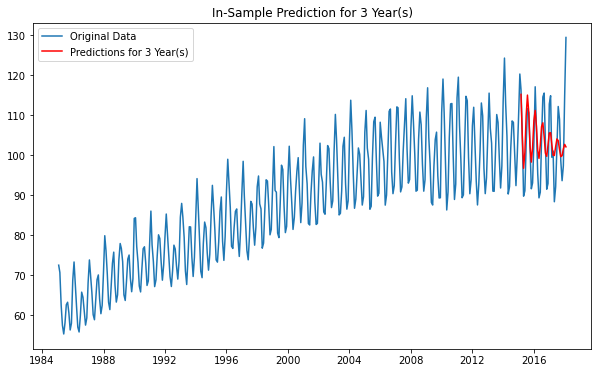

C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


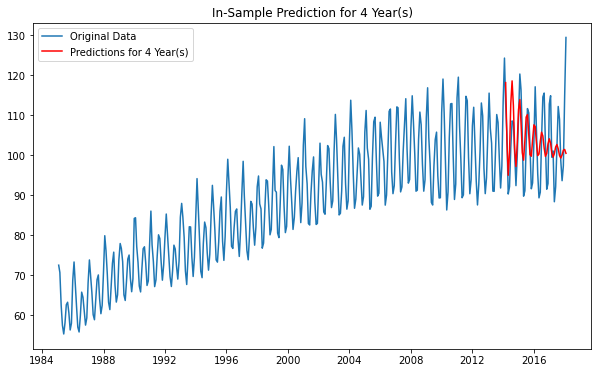

Metrics for 1-Year In-Sample Prediction:
  MSE: 70.17943878706366
  RMSE: 8.377316920533904
  MAPE: 5.855618424946119
  R2: 0.4165213866131857

Metrics for 2-Year In-Sample Prediction:
  MSE: 56.64145335564371
  RMSE: 7.526051644497512
  MAPE: 5.298146472936987
  R2: 0.4799735353882244

Metrics for 3-Year In-Sample Prediction:
  MSE: 68.45646622590068
  RMSE: 8.273842289160502
  MAPE: 6.391445269643141
  R2: 0.32902265498105343

Metrics for 4-Year In-Sample Prediction:
  MSE: 76.27631939414239
  RMSE: 8.733631512386035
  MAPE: 6.912715638171559
  R2: 0.20095466395161854



In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Function to perform in-sample prediction and calculate metrics
def in_sample_prediction_with_metrics(data, lags, years):
    months_per_year = 12
    train = data[:-years * months_per_year]
    test = data[-years * months_per_year:]
    model = AutoReg(train, lags=lags).fit()
    predictions = model.predict(start=test.index[0], end=test.index[-1])

    mse = mean_squared_error(test, predictions)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(test.values.flatten(), predictions)
    r2 = r2_score(test, predictions)

    return predictions, mse, rmse, mape, r2

# Load and prepare the dataset
file_path = "C:\\Users\\kshas\\Downloads\\Option4_Data\\Option4_Data\\Data\\Electric_Production.csv" # Replace with your file path
data = pd.read_csv(file_path)
data['date'] = pd.to_datetime(data['date'], format='%m-%d-%Y')
data['date'] = data['date'].dt.to_period('M').dt.to_timestamp('M')
data.set_index('date', inplace=True)

# In-sample predictions and metrics calculation for 1, 2, 3, and 4 years
lags = 4  # Adjust as necessary based on your autocorrelation analysis
metrics_ar = {}

for years in range(1, 5):
    predictions, mse, rmse, mape, r2 = in_sample_prediction_with_metrics(data, lags, years)
    metrics_ar[years] = {'MSE': mse, 'RMSE': rmse, 'MAPE': mape, 'R2': r2}

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(data, label='Original Data')
    plt.plot(predictions, label=f'Predictions for {years} Year(s)', color='red')
    plt.title(f'In-Sample Prediction for {years} Year(s)')
    plt.legend()
    plt.show()

# Print the metrics
for year, values in metrics_ar.items():
    print(f"Metrics for {year}-Year In-Sample Prediction:")
    for metric, value in values.items():
        print(f"  {metric}: {value}")
    print()


# MA

C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


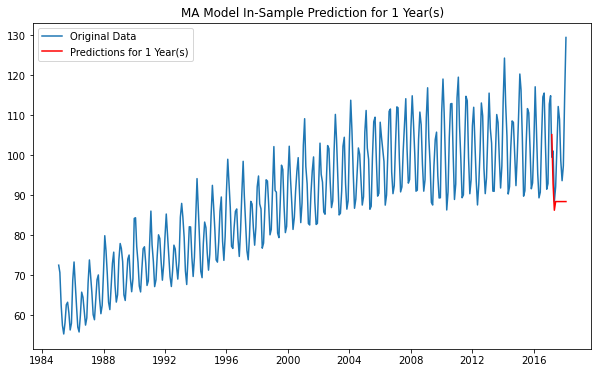

C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


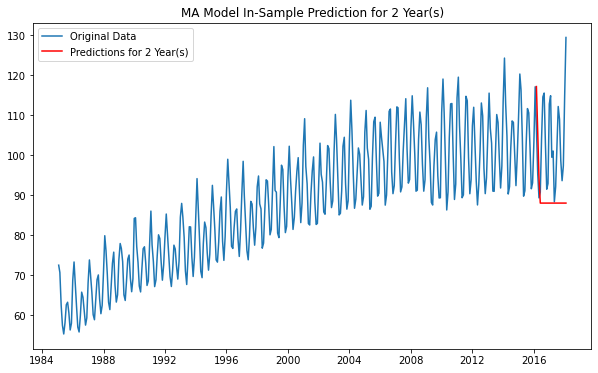

C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


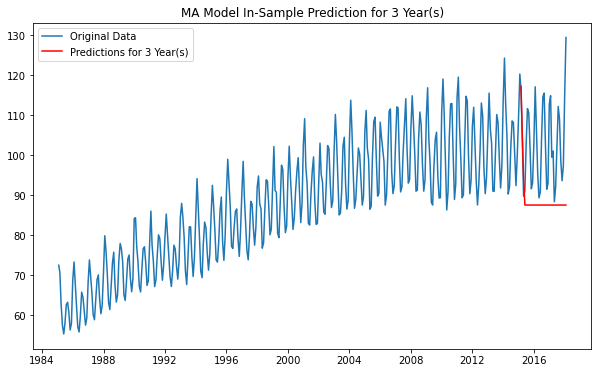

C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


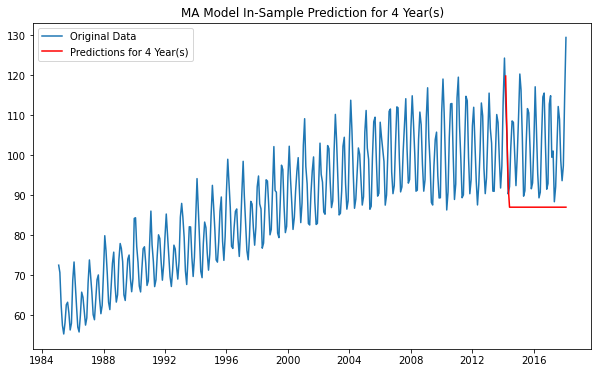

Metrics for 1-Year In-Sample Prediction with MA Model:
  MSE: 323.1636041028079
  RMSE: 17.976751767291216
  MAPE: 12.785678767622061
  R2: -1.6868133299143633

Metrics for 2-Year In-Sample Prediction with MA Model:
  MSE: 322.62185944006507
  RMSE: 17.961677522995036
  MAPE: 13.563094038434475
  R2: -1.961998589931619

Metrics for 3-Year In-Sample Prediction with MA Model:
  MSE: 305.727985134183
  RMSE: 17.485078928451625
  MAPE: 13.035037933324586
  R2: -1.9965986132908515

Metrics for 4-Year In-Sample Prediction with MA Model:
  MSE: 331.26317586579245
  RMSE: 18.200636688473082
  MAPE: 14.044199345012595
  R2: -2.4702027809231613



In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Function to perform in-sample prediction with a Moving Average model
def in_sample_prediction_ma(data, ma_order, years):
    months_per_year = 12
    train = data[:-years * months_per_year]
    test = data[-years * months_per_year:]
    model = ARIMA(train, order=(0, 0, ma_order)).fit()
    predictions = model.predict(start=test.index[0], end=test.index[-1])

    mse = mean_squared_error(test, predictions)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(test.values.flatten(), predictions)
    r2 = r2_score(test, predictions)

    return predictions, mse, rmse, mape, r2

# Load and prepare the dataset
file_path = "C:\\Users\\kshas\\Downloads\\Option4_Data\\Option4_Data\\Data\\Electric_Production.csv"  # Replace with your file path
data = pd.read_csv(file_path)
data['date'] = pd.to_datetime(data['date'], format='%m-%d-%Y')
data['date'] = data['date'].dt.to_period('M').dt.to_timestamp('M')
data.set_index('date', inplace=True)

# In-sample predictions and metrics calculation for 1, 2, 3, and 4 years using MA model
ma_order =3 # Adjust as necessary
metrics_ma = {}

for years in range(1, 5):
    predictions, mse, rmse, mape, r2 = in_sample_prediction_ma(data, ma_order, years)
    metrics_ma[years] = {'MSE': mse, 'RMSE': rmse, 'MAPE': mape, 'R2': r2}

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(data, label='Original Data')
    plt.plot(predictions, label=f'Predictions for {years} Year(s)', color='red')
    plt.title(f'MA Model In-Sample Prediction for {years} Year(s)')
    plt.legend()
    plt.show()

# Print the metrics
for year, values in metrics_ma.items():
    print(f"Metrics for {year}-Year In-Sample Prediction with MA Model:")
    for metric, value in values.items():
        print(f"  {metric}: {value}")
    print()


# ARMA

C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


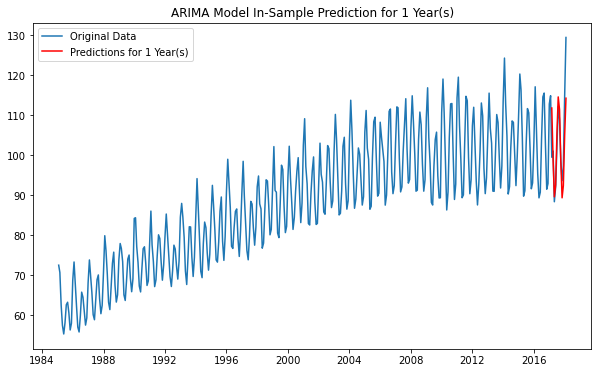

C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


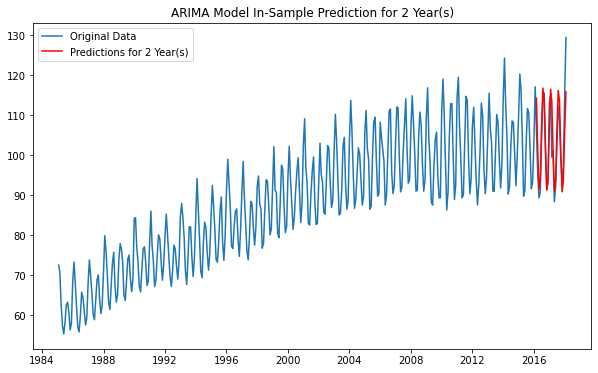

C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


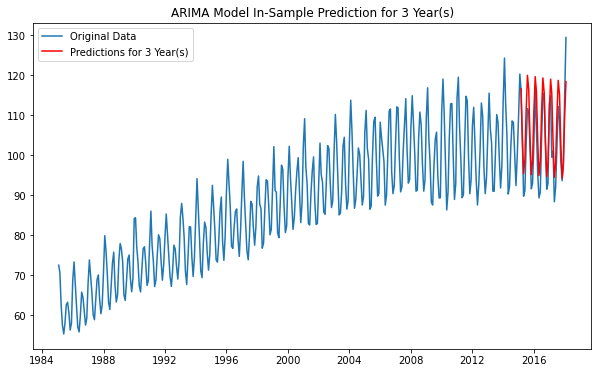

C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


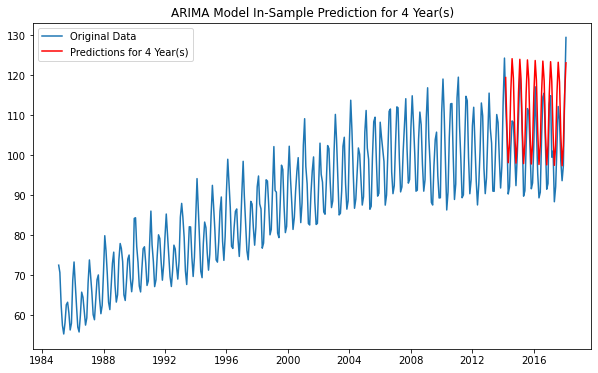

Metrics for 1-Year In-Sample Prediction with ARIMA Model:
  MSE: 45.6506919550522
  RMSE: 6.756529579233129
  MAPE: 4.487274833898012
  R2: 0.6204557502532726

Metrics for 2-Year In-Sample Prediction with ARIMA Model:
  MSE: 30.108909726975682
  RMSE: 5.487158620540843
  MAPE: 3.8964254503377074
  R2: 0.7235694186672177

Metrics for 3-Year In-Sample Prediction with ARIMA Model:
  MSE: 38.697569443999775
  RMSE: 6.220737049900098
  MAPE: 5.138181285315858
  R2: 0.6207050431359065

Metrics for 4-Year In-Sample Prediction with ARIMA Model:
  MSE: 79.60963790223524
  RMSE: 8.92242332005354
  MAPE: 7.875833270024639
  R2: 0.16603592864017302



In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Function to perform in-sample prediction with an ARIMA model
def in_sample_prediction_arima(data, arima_order, years):
    months_per_year = 12
    train = data[:-years * months_per_year]
    test = data[-years * months_per_year:]
    model = ARIMA(train, order=arima_order).fit()
    predictions = model.predict(start=test.index[0], end=test.index[-1])

    mse = mean_squared_error(test, predictions)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(test.values.flatten(), predictions)
    r2 = r2_score(test, predictions)

    return predictions, mse, rmse, mape, r2

# Load and prepare the dataset
file_path = "C:\\Users\\kshas\\Downloads\\Option4_Data\\Option4_Data\\Data\\Electric_Production.csv"
data = pd.read_csv(file_path)
data['date'] = pd.to_datetime(data['date'], format='%m-%d-%Y')
data['date'] = data['date'].dt.to_period('M').dt.to_timestamp('M')
data.set_index('date', inplace=True)

# Define ARIMA model order (p, d, q)
arima_order = (4, 0, 3)  # Example: Adjust based on your data analysis

# In-sample predictions and metrics calculation using ARIMA model
metrics_arima = {}

for years in range(1, 5):
    predictions, mse, rmse, mape, r2 = in_sample_prediction_arima(data, arima_order, years)
    metrics_arima[years] = {'MSE': mse, 'RMSE': rmse, 'MAPE': mape, 'R2': r2}

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(data, label='Original Data')
    plt.plot(predictions, label=f'Predictions for {years} Year(s)', color='red')
    plt.title(f'ARIMA Model In-Sample Prediction for {years} Year(s)')
    plt.legend()
    plt.show()

# Print the metrics
for year, values in metrics_arima.items():
    print(f"Metrics for {year}-Year In-Sample Prediction with ARIMA Model:")
    for metric, value in values.items():
        print(f"  {metric}: {value}")
    print()


# ARIMA

C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


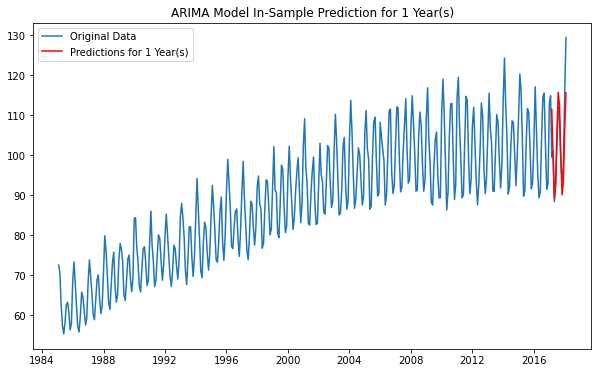

C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


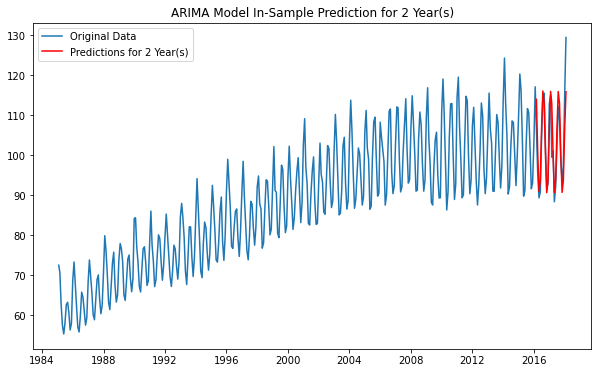

C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


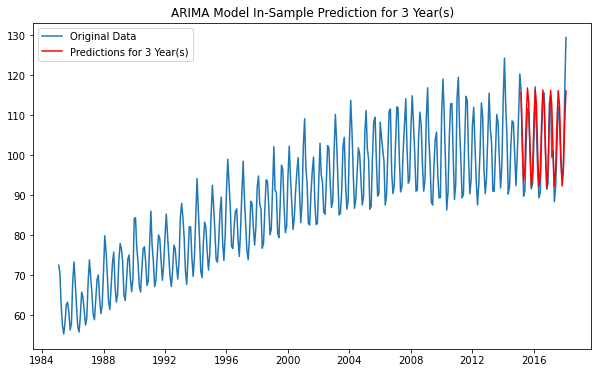

C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


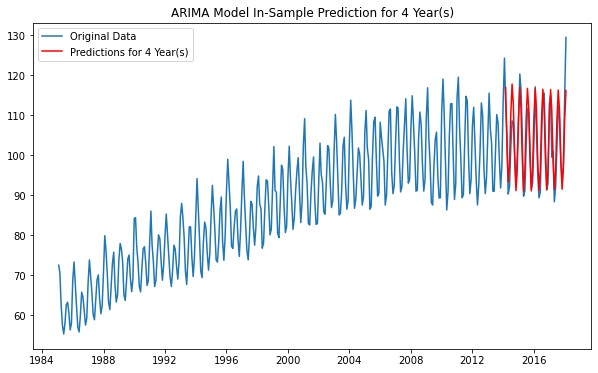

Metrics for 1-Year In-Sample Prediction with ARIMA Model:
  MSE: 39.88487649185476
  RMSE: 6.315447449853
  MAPE: 4.408227634899851
  R2: 0.6683932953470477

Metrics for 2-Year In-Sample Prediction with ARIMA Model:
  MSE: 28.040882113854916
  RMSE: 5.2953642097456255
  MAPE: 3.768720960688041
  R2: 0.742556026966589

Metrics for 3-Year In-Sample Prediction with ARIMA Model:
  MSE: 22.40975614652301
  RMSE: 4.733894395370793
  MAPE: 3.6341648883045576
  R2: 0.7803503524108735

Metrics for 4-Year In-Sample Prediction with ARIMA Model:
  MSE: 22.347121271986982
  RMSE: 4.727274190480914
  MAPE: 3.703184140412215
  R2: 0.7658989950181045



In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Function to perform in-sample prediction with an ARIMA model
def in_sample_prediction_arima(data, arima_order, years):
    months_per_year = 12
    train = data[:-years * months_per_year]
    test = data[-years * months_per_year:]
    model = ARIMA(train, order=arima_order).fit()
    predictions = model.predict(start=test.index[0], end=test.index[-1])

    mse = mean_squared_error(test, predictions)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(test.values.flatten(), predictions)
    r2 = r2_score(test, predictions)

    return predictions, mse, rmse, mape, r2

# Load and prepare the dataset
file_path = "C:\\Users\\kshas\\Downloads\\Option4_Data\\Option4_Data\\Data\\Electric_Production.csv"
data = pd.read_csv(file_path)
data['date'] = pd.to_datetime(data['date'], format='%m-%d-%Y')
data['date'] = data['date'].dt.to_period('M').dt.to_timestamp('M')
data.set_index('date', inplace=True)

# Define ARIMA model order (p, d, q)
arima_order = (5, 1, 5)  # Example: Adjust based on your data analysis

# In-sample predictions and metrics calculation using ARIMA model
metrics_arima = {}

for years in range(1, 5):
    predictions, mse, rmse, mape, r2 = in_sample_prediction_arima(data, arima_order, years)
    metrics_arima[years] = {'MSE': mse, 'RMSE': rmse, 'MAPE': mape, 'R2': r2}

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(data, label='Original Data')
    plt.plot(predictions, label=f'Predictions for {years} Year(s)', color='red')
    plt.title(f'ARIMA Model In-Sample Prediction for {years} Year(s)')
    plt.legend()
    plt.show()

# Print the metrics
for year, values in metrics_arima.items():
    print(f"Metrics for {year}-Year In-Sample Prediction with ARIMA Model:")
    for metric, value in values.items():
        print(f"  {metric}: {value}")
    print()


# SARIMA

C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


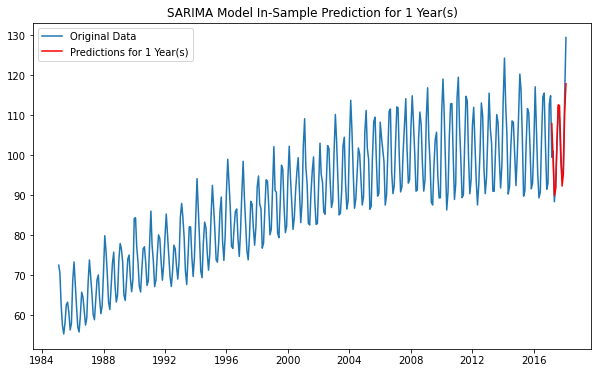

C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


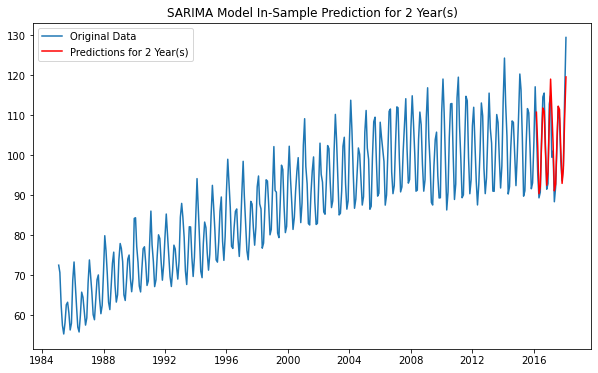

C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


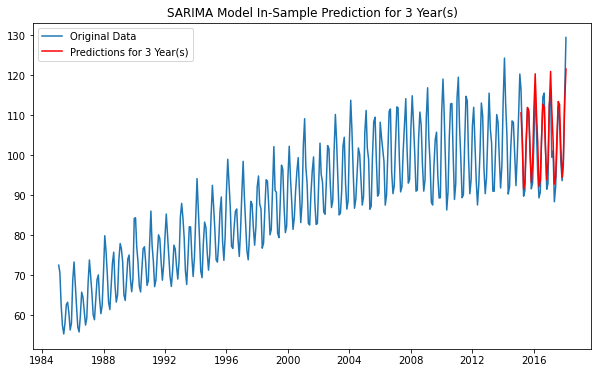

C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)


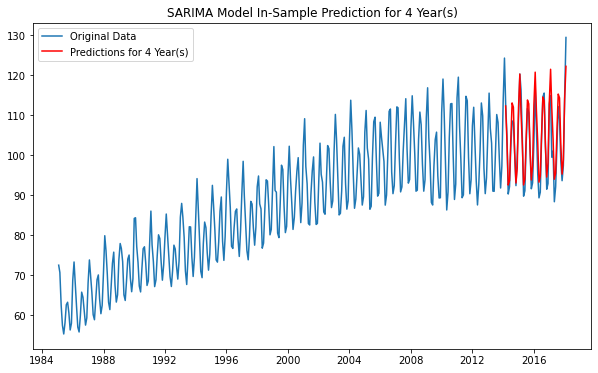

Metrics for 1-Year In-Sample Prediction with SARIMA Model:
  MSE: 21.30916550099123
  RMSE: 4.616185167537285
  MAPE: 2.997471482774448
  R2: 0.8228335456390058

Metrics for 2-Year In-Sample Prediction with SARIMA Model:
  MSE: 18.500458427418998
  RMSE: 4.301215924296175
  MAPE: 3.023065086654241
  R2: 0.8301468726570161

Metrics for 3-Year In-Sample Prediction with SARIMA Model:
  MSE: 17.074878421785357
  RMSE: 4.132175991143813
  MAPE: 3.1430393269308188
  R2: 0.832640257062581

Metrics for 4-Year In-Sample Prediction with SARIMA Model:
  MSE: 16.414036984794944
  RMSE: 4.0514240687436
  MAPE: 3.1333621577833726
  R2: 0.8280520113896156



In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Function to perform in-sample prediction with a SARIMA model
def in_sample_prediction_sarima(data, sarima_order, seasonal_order, years):
    months_per_year = 12
    train = data[:-years * months_per_year]
    test = data[-years * months_per_year:]
    model = SARIMAX(train, order=sarima_order, seasonal_order=seasonal_order).fit()
    predictions = model.predict(start=test.index[0], end=test.index[-1])

    mse = mean_squared_error(test, predictions)
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(test.values.flatten(), predictions)
    r2 = r2_score(test, predictions)

    return predictions, mse, rmse, mape, r2

# Load and prepare the dataset
file_path = "C:\\Users\\kshas\\Downloads\\Option4_Data\\Option4_Data\\Data\\Electric_Production.csv"
data = pd.read_csv(file_path)
data['date'] = pd.to_datetime(data['date'], format='%m-%d-%Y')
data['date'] = data['date'].dt.to_period('M').dt.to_timestamp('M')
data.set_index('date', inplace=True)

# Define SARIMA model orders
sarima_order = (1, 1, 1)  # 
seasonal_order = (1, 1, 1, 12)  # 

# In-sample predictions and metrics calculation using SARIMA model
metrics_sarima = {}

for years in range(1, 5):
    predictions, mse, rmse, mape, r2 = in_sample_prediction_sarima(data, sarima_order, seasonal_order, years)
    metrics_sarima[years] = {'MSE': mse, 'RMSE': rmse, 'MAPE': mape, 'R2': r2}

    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(data, label='Original Data')
    plt.plot(predictions, label=f'Predictions for {years} Year(s)', color='red')
    plt.title(f'SARIMA Model In-Sample Prediction for {years} Year(s)')
    plt.legend()
    plt.show()

# Print the metrics
for year, values in metrics_sarima.items():
    print(f"Metrics for {year}-Year In-Sample Prediction with SARIMA Model:")
    for metric, value in values.items():
        print(f"  {metric}: {value}")
    print()


# LSTM

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# Load and prepare the dataset
file_path = "C:\\Users\\kshas\\Downloads\\Option4_Data\\Option4_Data\\Data\\Electric_Production.csv"
data = pd.read_csv(file_path)
data['date'] = pd.to_datetime(data['date'], format='%m-%d-%Y')
data.set_index('date', inplace=True)

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data)

# Number of months per year (assuming monthly data)
months_per_year = 12

# Define the look_back period
look_back = 3

# Dictionary to store metrics for each year
metrics_lstm = {}

# In-sample predictions and metrics calculation for 1, 2, 3, and 4 years
for year in [1, 2, 3, 4]:
    # Determine train and test size
    test_size = year * months_per_year
    train_size = len(data_scaled) - test_size

    # Split data into train and test sets
    train, test = data_scaled[0:train_size, :], data_scaled[train_size - look_back - 1: len(data_scaled), :]
    X_train, Y_train = create_dataset(train, look_back)
    X_test, Y_test = create_dataset(test, look_back)

    # Reshape input to be [samples, time steps, features]
    X_train = X_train.reshape((X_train.shape[0], look_back, 1))
    X_test = X_test.reshape((X_test.shape[0], look_back, 1))

    # Create and fit the LSTM model
    model = Sequential()
    model.add(LSTM(50, input_shape=(look_back, 1)))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, Y_train, epochs=100, batch_size=1, verbose=0)

    # Predictions
    test_predict = model.predict(X_test)

    # Invert predictions
    test_predict = scaler.inverse_transform(test_predict)
    Y_test_inv = scaler.inverse_transform([Y_test])

    # Metrics calculation
    mse = mean_squared_error(Y_test_inv[0], test_predict[:, 0])
    rmse = np.sqrt(mse)
    mape = mean_absolute_percentage_error(Y_test_inv[0], test_predict[:, 0])
    r2 = r2_score(Y_test_inv[0], test_predict[:, 0])

    metrics_lstm[year] = {'MSE': mse, 'RMSE': rmse, 'MAPE': mape, 'R2': r2}


# Print metrics
for year, values in metrics_lstm.items():
    print(f"Metrics for {year}-Year In-Sample Prediction:")
    for metric, value in values.items():
        print(f"  {metric}: {value}")
    print()


2/2 [==============================] - 0s 7ms/step
Metrics for 1-Year In-Sample Prediction:
  MSE: 43.633748057484986
  RMSE: 6.605584611333428
  MAPE: 5.379576010541762
  R2: 0.4005604384515612

Metrics for 2-Year In-Sample Prediction:
  MSE: 41.45729252096775
  RMSE: 6.438733766896077
  MAPE: 4.949314654877242
  R2: 0.5274729182608767

Metrics for 3-Year In-Sample Prediction:
  MSE: 36.56855341082339
  RMSE: 6.047193845977107
  MAPE: 4.704859945012994
  R2: 0.5972509281712274

Metrics for 4-Year In-Sample Prediction:
  MSE: 44.36576659107442
  RMSE: 6.660763213857284
  MAPE: 5.212023876007258
  R2: 0.5088497767343634



# OUTSAMPLING

# AR

C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


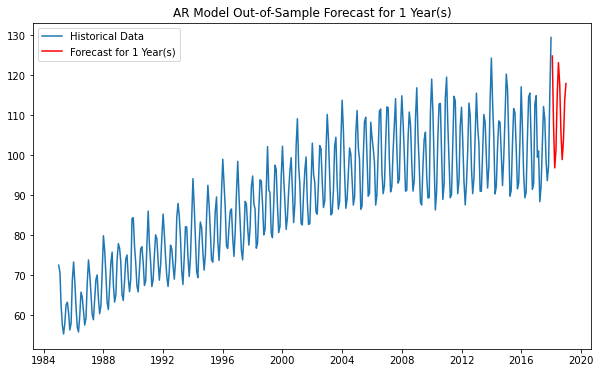

C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


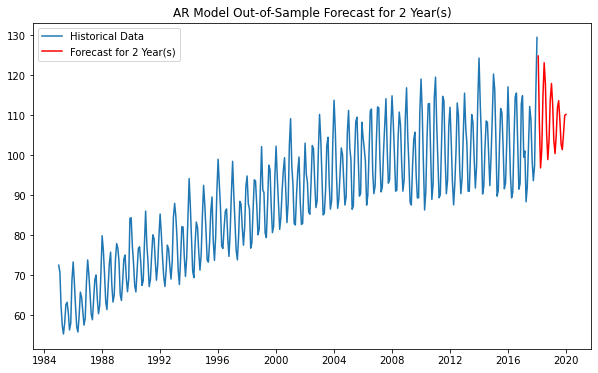

C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


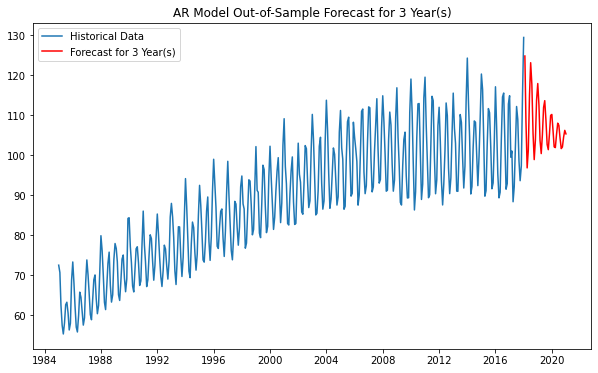

C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


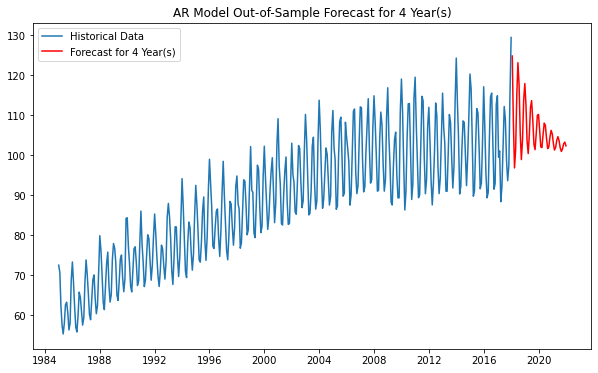

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Function to calculate Mean Absolute Percentage Error (MAPE)
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Load and prepare the dataset
file_path = "C:\\Users\\kshas\\Downloads\\Option4_Data\\Option4_Data\\Data\\Electric_Production.csv"
data = pd.read_csv(file_path)
data['date'] = pd.to_datetime(data['date'], format='%m-%d-%Y')
data.set_index('date', inplace=True)

# Number of months per year
months_per_year = 12

# Create and fit the AR model
model = AutoReg(data, lags=4).fit()

# Out-of-sample forecast for 1, 2, 3, and 4 years
forecasts = {}
for years in [1, 2, 3, 4]:
    forecast_length = years * months_per_year
    forecast = model.predict(start=len(data), end=len(data) + forecast_length - 1, dynamic=True)
    forecasts[years] = forecast

    # Plotting forecasts
    plt.figure(figsize=(10, 6))
    plt.plot(data, label='Historical Data')
    plt.plot(forecast, label=f'Forecast for {years} Year(s)', color='red')
    plt.title(f'AR Model Out-of-Sample Forecast for {years} Year(s)')
    plt.legend()
    plt.show()

# There are no metrics like MSE, RMSE for out-of-sample forecasts as we do not have actual values to compare.


# MA

C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


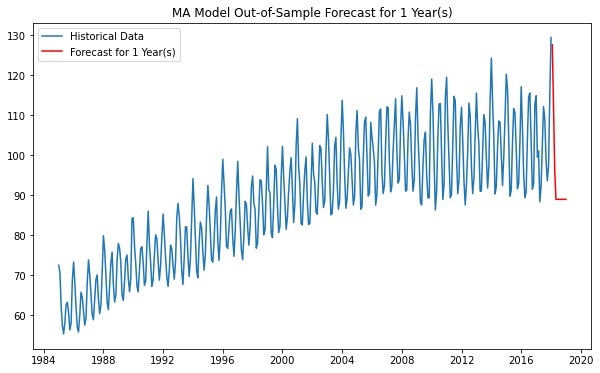

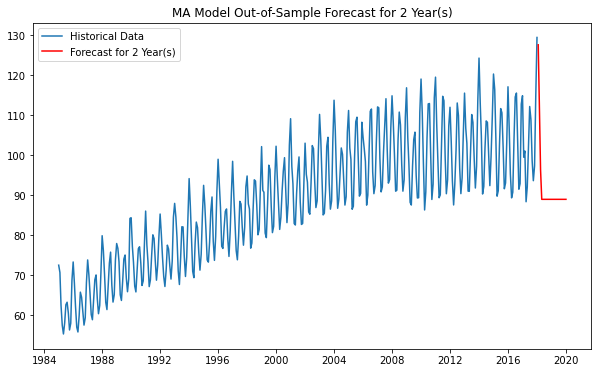

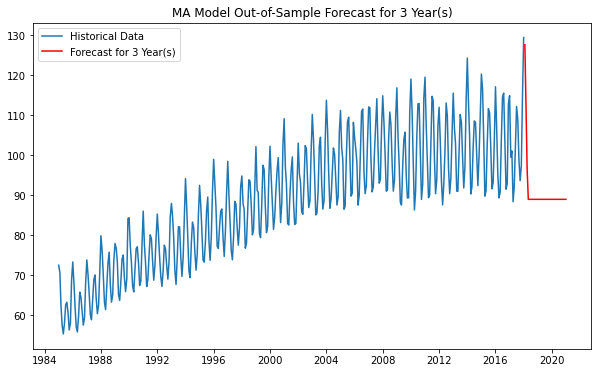

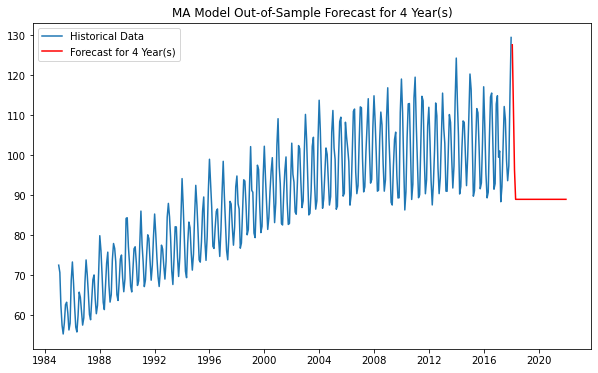

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load and prepare the dataset
file_path = "C:\\Users\\kshas\\Downloads\\Option4_Data\\Option4_Data\\Data\\Electric_Production.csv"
data = pd.read_csv(file_path)
data['date'] = pd.to_datetime(data['date'], format='%m-%d-%Y')
data.set_index('date', inplace=True)

# Number of months per year
months_per_year = 12

# Create and fit the MA model (using ARIMA with AR and differencing components set to zero)
model = ARIMA(data, order=(0, 0, 3)).fit()

# Out-of-sample forecast for 1, 2, 3, and 4 years
forecasts = {}
for years in [1, 2, 3, 4]:
    forecast_length = years * months_per_year
    forecast = model.predict(start=len(data), end=len(data) + forecast_length - 1, dynamic=True)
    forecasts[years] = forecast

    # Plotting forecasts
    plt.figure(figsize=(10, 6))
    plt.plot(data, label='Historical Data')
    plt.plot(forecast, label=f'Forecast for {years} Year(s)', color='red')
    plt.title(f'MA Model Out-of-Sample Forecast for {years} Year(s)')
    plt.legend()
    plt.show()

# Note: As with the AR model, metrics like MSE or RMSE cannot be calculated for out-of-sample forecasts.


# ARMA

C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


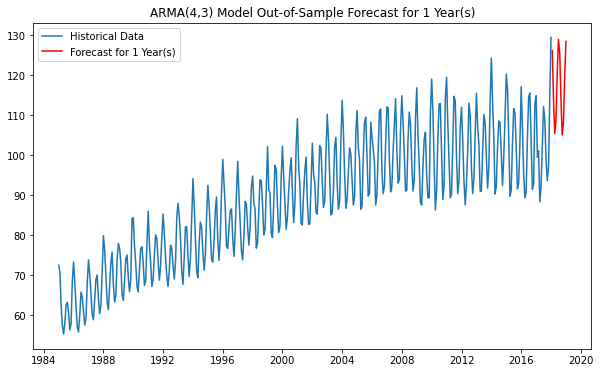

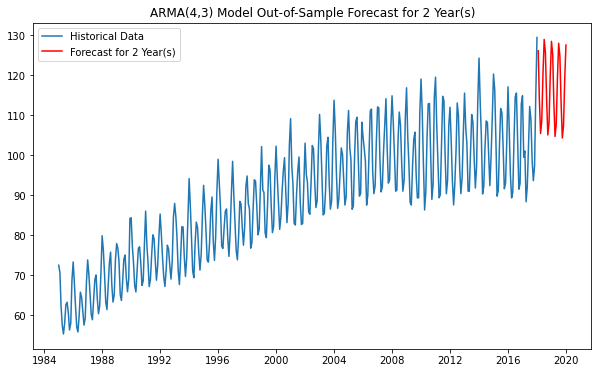

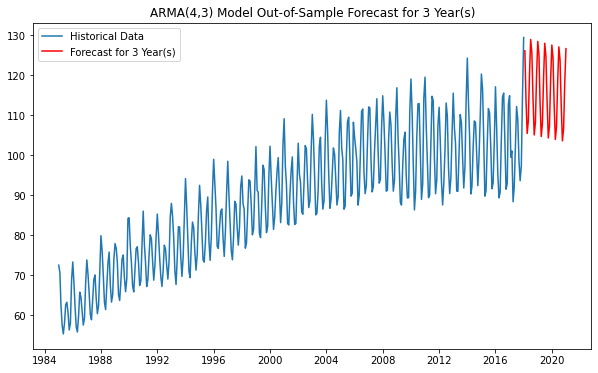

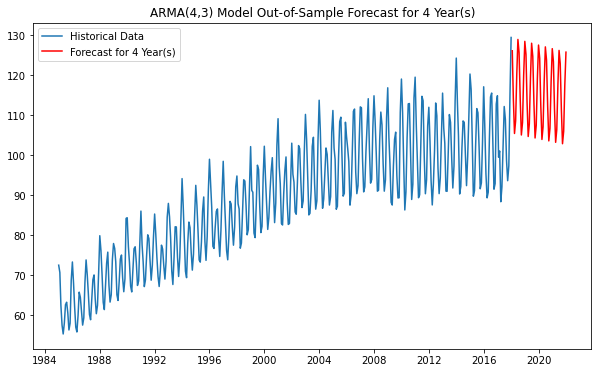

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load and prepare the dataset
file_path = "C:\\Users\\kshas\\Downloads\\Option4_Data\\Option4_Data\\Data\\Electric_Production.csv"
data = pd.read_csv(file_path)
data['date'] = pd.to_datetime(data['date'], format='%m-%d-%Y')
data.set_index('date', inplace=True)

# Number of months per year (assuming monthly data)
months_per_year = 12

# Create and fit the ARMA model (using ARIMA with d=0)
model = ARIMA(data, order=(4, 0, 3)).fit()

# Out-of-sample forecast for 1, 2, 3, and 4 years
forecasts = {}
for years in [1, 2, 3, 4]:
    forecast_length = years * months_per_year
    forecast = model.predict(start=len(data), end=len(data) + forecast_length - 1)
    forecasts[years] = forecast

    # Plotting forecasts
    plt.figure(figsize=(10, 6))
    plt.plot(data, label='Historical Data')
    plt.plot(forecast, label=f'Forecast for {years} Year(s)', color='red')
    plt.title(f'ARMA(4,3) Model Out-of-Sample Forecast for {years} Year(s)')
    plt.legend()
    plt.show()


# ARIMA

C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\kshas\anaconda3\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


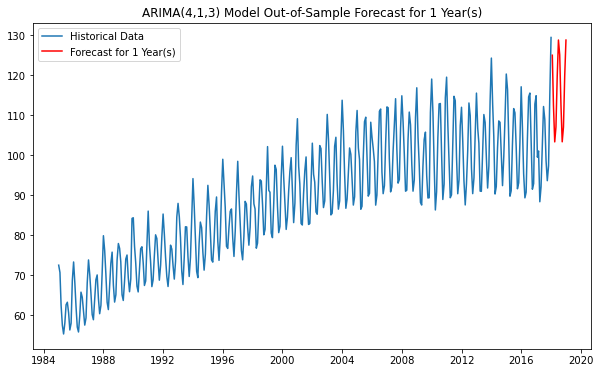

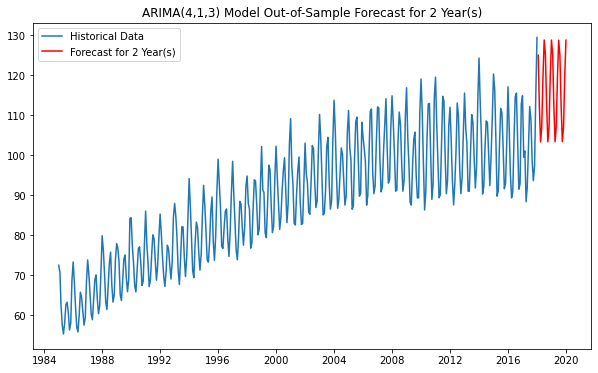

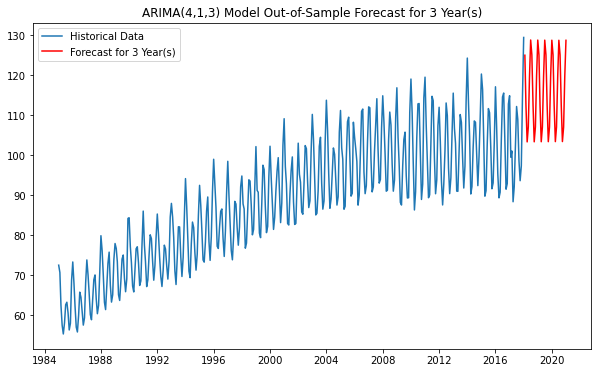

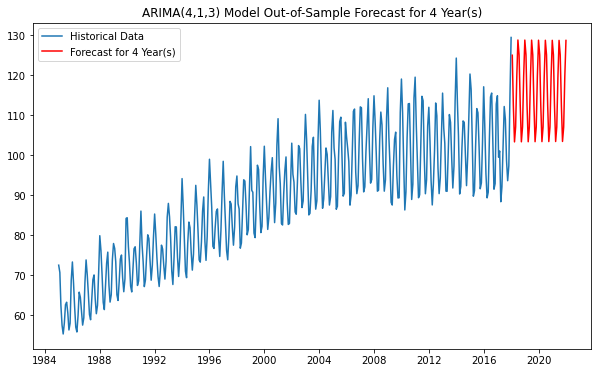

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Load and prepare the dataset
file_path = "C:\\Users\\kshas\\Downloads\\Option4_Data\\Option4_Data\\Data\\Electric_Production.csv"
data = pd.read_csv(file_path)
data['date'] = pd.to_datetime(data['date'], format='%m-%d-%Y')
data.set_index('date', inplace=True)

# Number of months per year (assuming monthly data)
months_per_year = 12

# Create and fit the ARMA model (using ARIMA with d=0)
model = ARIMA(data, order=(4, 1, 3)).fit()

# Out-of-sample forecast for 1, 2, 3, and 4 years
forecasts = {}
for years in [1, 2, 3, 4]:
    forecast_length = years * months_per_year
    forecast = model.predict(start=len(data), end=len(data) + forecast_length - 1)
    forecasts[years] = forecast

    # Plotting forecasts
    plt.figure(figsize=(10, 6))
    plt.plot(data, label='Historical Data')
    plt.plot(forecast, label=f'Forecast for {years} Year(s)', color='red')
    plt.title(f'ARIMA(4,1,3) Model Out-of-Sample Forecast for {years} Year(s)')
    plt.legend()
    plt.show()
